In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Test = pd.read_csv('./data/DailyDelhiClimateTest.csv', )

In [3]:
Test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [4]:
Train = pd.read_csv('./data/DailyDelhiClimateTrain.csv', )

In [5]:
Train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [6]:
Train.shape

(1462, 5)

In [7]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)

    return numerator / (denominator + 1e-7)

In [8]:
train_x = Train[['meantemp', 'humidity', 'wind_speed', 'meanpressure']]
train_x = MinMaxScaler(train_x)

train_y = train_x[['meantemp']]
train_x = train_x[['humidity', 'wind_speed', 'meanpressure']]

train_x

,humidity,wind_speed,meanpressure
0,0.820957,0.000000,0.132603
1,0.907591,0.070583,0.132881
2,0.849835,0.109743,0.132994
3,0.668867,0.029212,0.132799
4,0.847910,0.087636,0.132712
...,...,...,...
1457,0.630865,0.084032,0.132590
1458,0.859736,0.142113,0.132764
1459,0.880638,0.148429,0.132895
1460,0.849835,0.173496,0.132660


In [9]:
test_x = Test[['meantemp', 'humidity', 'wind_speed', 'meanpressure']]
test_x = MinMaxScaler(test_x)

test_y = test_x[['meantemp']]
test_x = test_x[['humidity', 'wind_speed', 'meanpressure']]

test_x

,humidity,wind_speed,meanpressure
0,0.872396,0.075640,0.000000
1,0.761651,0.084061,0.995298
2,0.821416,0.146661,0.995356
3,0.669797,0.176133,0.992624
4,0.732480,0.106684,0.991206
...,...,...,...
109,0.124867,0.232892,0.974907
110,0.276948,0.310987,0.976204
111,0.296478,0.418508,0.977994
112,0.124867,0.478334,0.978539


In [10]:
time_step = 7
step = 1


def create_dataset(X, y, time_step, step):
    Xs, ys = [], []

    for i in range(0, len(X) - time_step, step):
        v = X.iloc[i: (i + time_step)].values
        labels = y.iloc[i + time_step]

        Xs.append(v)
        ys.append(labels)

    return np.array(Xs), np.array(ys)

In [11]:
X_train, y_train = create_dataset(train_x, train_y, time_step, step)
X_test, y_test = create_dataset(test_x, test_y, time_step, step)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1455, 7, 3), (1455, 1))

In [13]:
n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]
n_timesteps, n_features, n_outputs

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, Conv1D, MaxPooling1D, Flatten

In [32]:
model = Sequential([
    SimpleRNN(16, activation='relu', input_shape=(n_timesteps, n_features), return_sequences=True),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation = 'linear')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 7, 16)             320       
                                                                 
 flatten_3 (Flatten)         (None, 112)               0         
                                                                 
 dense_6 (Dense)             (None, 16)                1808      
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,145
Trainable params: 2,145
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='mse', optimizer='adam')

In [35]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=(0.1), shuffle=False)

Epoch 1/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0301 - val_loss: 0.0293
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0295 - val_loss: 0.0298
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0294 - val_loss: 0.0302
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0292 - val_loss: 0.0303
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0291 - val_loss: 0.0306
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0290 - val_loss: 0.0308
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0290 - val_loss: 0.0309
Epoch 8/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0289 - val_loss: 0.0308
Epoch 9/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0288 - val_loss: 0.0310
Epoch 10/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0287 - val_loss: 0.0310
Epoch 11/

41/41 [==============================] - 0s 3ms/step - loss: 0.0243 - val_loss: 0.0295
Epoch 84/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0243 - val_loss: 0.0296
Epoch 85/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0243 - val_loss: 0.0295
Epoch 86/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0243 - val_loss: 0.0296
Epoch 87/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0242 - val_loss: 0.0295
Epoch 88/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0241 - val_loss: 0.0295
Epoch 89/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0241 - val_loss: 0.0295
Epoch 90/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0241 - val_loss: 0.0295
Epoch 91/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0240 - val_loss: 0.0294
Epoch 92/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0240 - val_loss: 0.0296
Epoch 93/100


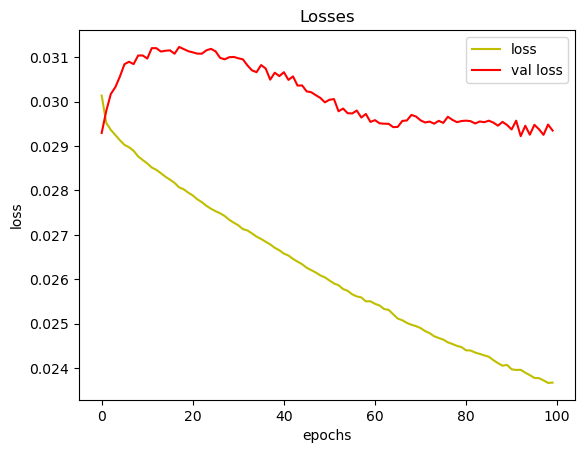

In [36]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x = np.arange(0, len(history.history['loss']))

plt.plot(x, loss, 'y', label='loss')
plt.plot(x, val_loss, 'r', label='val loss')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [39]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


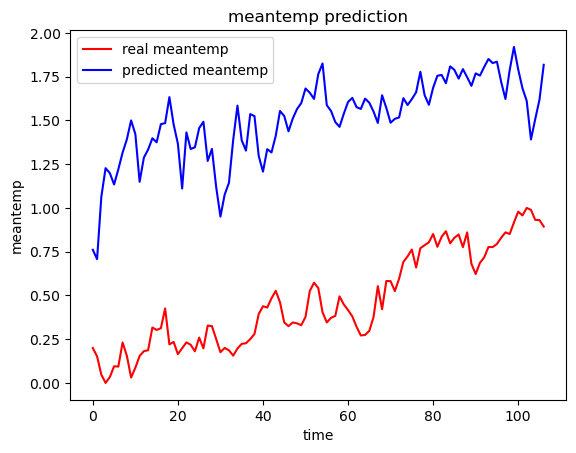

In [40]:
y_pred.shape

plt.plot(y_test, color='red', label='real meantemp')
plt.plot(y_pred, color='blue', label='predicted meantemp')
plt.title('meantemp prediction')
plt.xlabel('time')
plt.ylabel('meantemp')
plt.legend()
plt.show()